## Estudio de calidad de los Modelos de segmentación de celulas
Evaluación de la precisión y efectividad
TFG Walid Sabhi

### Metricas de evaluación

# Imagen 7

In [131]:
from PIL import Image
import numpy as np

# Cargar imágenes segmentadas y ground truth
segmented_image = np.array(Image.open('C:/Users/walid/OneDrive/Desktop/TFG/estudio_calidad/cell_00007_label.tif').convert('L'))
ground_truth_image = np.array(Image.open('C:/Users/walid/OneDrive/Desktop/TFG/estudio_calidad/cell_00007.label.tif').convert('L'))

# Normalizar imágenes (si no están en binario)
segmented_image = segmented_image / 255.0
ground_truth_image = ground_truth_image / 255.0


In [65]:
# Función para calcular el coeficiente de Dice
def dice_coefficient(pred, gt):
    intersection = np.sum(pred * gt)
    return (2. * intersection) / (np.sum(pred) + np.sum(gt) + 1e-7)

# Función para calcular la puntuación de Intersection over Union (IoU)
def iou_score(pred, gt):
    intersection = np.sum(pred * gt)
    union = np.sum(pred) + np.sum(gt) - intersection
    return intersection / (union + 1e-7)

# Función para calcular la precisión (Precision)
def precision(pred, gt):
    tp = np.sum(pred * gt)
    fp = np.sum(pred * (1 - gt))
    return tp / (tp + fp + 1e-7)

# Función para calcular el recall
def recall(pred, gt):
    tp = np.sum(pred * gt)
    fn = np.sum((1 - pred) * gt)
    return tp / (tp + fn + 1e-7)

# Función para calcular el F1-Score
def f1_score(pred, gt):
    p = precision(pred, gt)
    r = recall(pred, gt)
    return 2 * (p * r) / (p + r + 1e-7)

In [66]:
# Calcular métricas
dice = dice_coefficient(segmented_image, ground_truth_image)
iou = iou_score(segmented_image, ground_truth_image)
prec = precision(segmented_image, ground_truth_image)
rec = recall(segmented_image, ground_truth_image)
f1 = f1_score(segmented_image, ground_truth_image)

# Mostrar los resultados
print("Métricas de Segmentación:")
print(f"Coeficiente de Dice: {dice:.4f}")
print(f"IOU: {iou:.4f}")
print(f"Precisión: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")


Métricas de Segmentación:
Coeficiente de Dice: 0.2833
IOU: 0.1650
Precisión: 0.4531
Recall: 0.2061
F1-Score: 0.2833


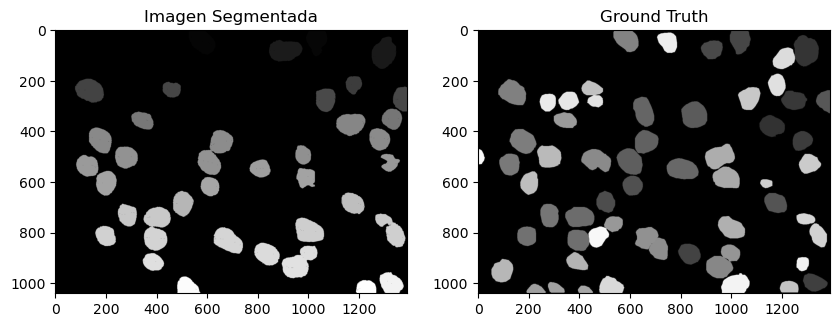

In [68]:
import matplotlib.pyplot as plt

# Visualización de las imágenes
def plot_comparison(pred, gt):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Imagen Segmentada")
    plt.imshow(pred, cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title("Ground Truth")
    plt.imshow(gt, cmap="gray")
    plt.show()

# Mostrar la comparación entre las imágenes
plot_comparison(segmented_image, ground_truth_image)


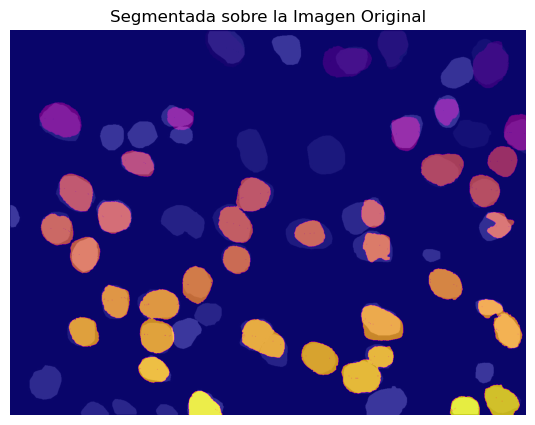

In [109]:
# Visualización de la imagen segmentada sobre la original
def plot_overlay(segmented, original, alpha=0):
    """
    Muestra la imagen segmentada superpuesta sobre la original con transparencia.
    segmented: Imagen segmentada
    original: Imagen original
    alpha: Nivel de transparencia de la segmentación
    """
    plt.figure(figsize=(10, 5))
    
    # Mostrar la imagen original
    plt.imshow(original, cmap="gray")
    
    # Mostrar la imagen segmentada con transparencia
    plt.imshow(segmented, cmap="plasma", alpha=alpha)  # Usamos un mapa de colores 'jet' para destacar las áreas
    plt.title("Segmentada sobre la Imagen Original")
    plt.axis('off')
    plt.show()

# Llamar a la función de visualización con las imágenes
plot_overlay(segmented_image, ground_truth_image, alpha=0.8)


In [132]:
import numpy as np
from sklearn.metrics import accuracy_score

# Calcular Accuracy
def calculate_accuracy(segmented, ground_truth, threshold=0.5):
    """
    Calcula el accuracy entre las imágenes segmentadas y las ground truth.
    threshold: Umbral para convertir las probabilidades en binario (0 o 1)
    """
    # Asegurarse de que las imágenes estén en formato binario (0 o 1)
    segmented_binary = (segmented > threshold).astype(int)
    ground_truth_binary = (ground_truth > threshold).astype(int)
    
    # Aplanar las imágenes para comparar los píxeles como vectores
    flattened_segmented = segmented_binary.flatten()
    flattened_ground_truth = ground_truth_binary.flatten()
    
    # Calcular el accuracy comparando los píxeles segmentados con la ground truth
    accuracy = accuracy_score(flattened_ground_truth, flattened_segmented)
    return accuracy

# Calcular Binary Cross-Entropy Loss
def calculate_bce_loss(segmented, ground_truth):
    # Asegúrese de que las imágenes estén en formato flotante
    segmented = segmented.astype(np.float32)
    ground_truth = ground_truth.astype(np.float32)
    
    # Evitar log(0) añadiendo un pequeño valor epsilon
    epsilon = 1e-15
    segmented = np.clip(segmented, epsilon, 1. - epsilon)
    
    # Calcular la Binary Cross-Entropy Loss
    bce_loss = -np.mean(ground_truth * np.log(segmented) + (1 - ground_truth) * np.log(1 - segmented))
    return bce_loss

# Calcular las métricas
accuracy = calculate_accuracy(segmented_image, ground_truth_image)
bce_loss = calculate_bce_loss(segmented_image, ground_truth_image)

# Mostrar los resultados
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"BCE Loss: {bce_loss:.4f}")

Accuracy: 88.54%
BCE Loss: 1.8921


# Imagen 8

In [133]:
from PIL import Image
import numpy as np

# Cargar imágenes segmentadas y ground truth
segmented_image = np.array(Image.open('C:/Users/walid/OneDrive/Desktop/TFG/estudio_calidad/cell_00008_label.tif').convert('L'))
ground_truth_image = np.array(Image.open('C:/Users/walid/OneDrive/Desktop/TFG/estudio_calidad/cell_00008.label.tif').convert('L'))

# Normalizar imágenes (si no están en binario)
segmented_image = segmented_image / 255.0
ground_truth_image = ground_truth_image / 255.0


In [134]:
# Función para calcular el coeficiente de Dice
def dice_coefficient(pred, gt):
    intersection = np.sum(pred * gt)
    return (2. * intersection) / (np.sum(pred) + np.sum(gt) + 1e-7)

# Función para calcular la puntuación de Intersection over Union (IoU)
def iou_score(pred, gt):
    intersection = np.sum(pred * gt)
    union = np.sum(pred) + np.sum(gt) - intersection
    return intersection / (union + 1e-7)

# Función para calcular la precisión (Precision)
def precision(pred, gt):
    tp = np.sum(pred * gt)
    fp = np.sum(pred * (1 - gt))
    return tp / (tp + fp + 1e-7)

# Función para calcular el recall
def recall(pred, gt):
    tp = np.sum(pred * gt)
    fn = np.sum((1 - pred) * gt)
    return tp / (tp + fn + 1e-7)

# Función para calcular el F1-Score
def f1_score(pred, gt):
    p = precision(pred, gt)
    r = recall(pred, gt)
    return 2 * (p * r) / (p + r + 1e-7)

In [135]:
# Calcular métricas
dice = dice_coefficient(segmented_image, ground_truth_image)
iou = iou_score(segmented_image, ground_truth_image)
prec = precision(segmented_image, ground_truth_image)
rec = recall(segmented_image, ground_truth_image)
f1 = f1_score(segmented_image, ground_truth_image)

# Mostrar los resultados
print("Métricas de Segmentación:")
print(f"Coeficiente de Dice: {dice:.4f}")
print(f"IOU: {iou:.4f}")
print(f"Precisión: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")


Métricas de Segmentación:
Coeficiente de Dice: 0.1762
IOU: 0.0966
Precisión: 0.4234
Recall: 0.1112
F1-Score: 0.1762


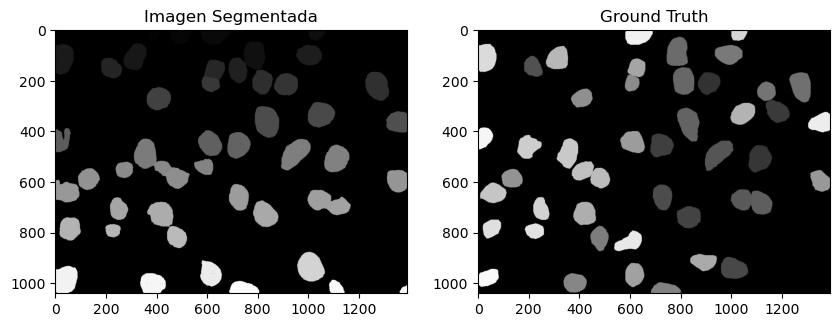

In [136]:
import matplotlib.pyplot as plt

# Visualización de las imágenes
def plot_comparison(pred, gt):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Imagen Segmentada")
    plt.imshow(pred, cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title("Ground Truth")
    plt.imshow(gt, cmap="gray")
    plt.show()

# Mostrar la comparación entre las imágenes
plot_comparison(segmented_image, ground_truth_image)


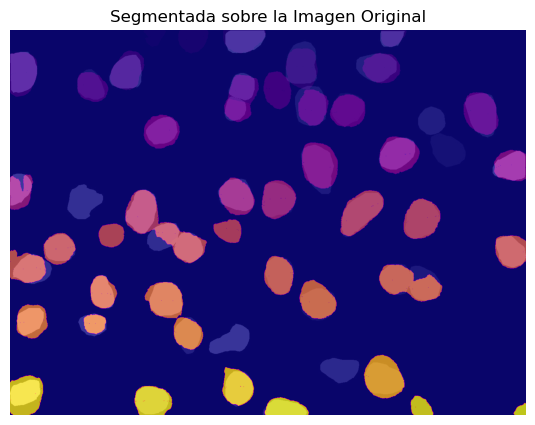

In [114]:
# Visualización de la imagen segmentada sobre la original
def plot_overlay(segmented, original, alpha=0):
    """
    Muestra la imagen segmentada superpuesta sobre la original con transparencia.
    segmented: Imagen segmentada
    original: Imagen original
    alpha: Nivel de transparencia de la segmentación
    """
    plt.figure(figsize=(10, 5))
    
    # Mostrar la imagen original
    plt.imshow(original, cmap="gray")
    
    # Mostrar la imagen segmentada con transparencia
    plt.imshow(segmented, cmap="plasma", alpha=alpha)  # Usamos un mapa de colores 'jet' para destacar las áreas
    plt.title("Segmentada sobre la Imagen Original")
    plt.axis('off')
    plt.show()

# Llamar a la función de visualización con las imágenes
plot_overlay(segmented_image, ground_truth_image, alpha=0.8)


In [137]:
import numpy as np
from sklearn.metrics import accuracy_score

# Calcular Accuracy
def calculate_accuracy(segmented, ground_truth, threshold=0.5):
    """
    Calcula el accuracy entre las imágenes segmentadas y las ground truth.
    threshold: Umbral para convertir las probabilidades en binario (0 o 1)
    """
    # Asegurarse de que las imágenes estén en formato binario (0 o 1)
    segmented_binary = (segmented > threshold).astype(int)
    ground_truth_binary = (ground_truth > threshold).astype(int)
    
    # Aplanar las imágenes para comparar los píxeles como vectores
    flattened_segmented = segmented_binary.flatten()
    flattened_ground_truth = ground_truth_binary.flatten()
    
    # Calcular el accuracy comparando los píxeles segmentados con la ground truth
    accuracy = accuracy_score(flattened_ground_truth, flattened_segmented)
    return accuracy

# Calcular Binary Cross-Entropy Loss
def calculate_bce_loss(segmented, ground_truth):
    # Asegúrese de que las imágenes estén en formato flotante
    segmented = segmented.astype(np.float32)
    ground_truth = ground_truth.astype(np.float32)
    
    # Evitar log(0) añadiendo un pequeño valor epsilon
    epsilon = 1e-15
    segmented = np.clip(segmented, epsilon, 1. - epsilon)
    
    # Calcular la Binary Cross-Entropy Loss
    bce_loss = -np.mean(ground_truth * np.log(segmented) + (1 - ground_truth) * np.log(1 - segmented))
    return bce_loss

# Calcular las métricas
accuracy = calculate_accuracy(segmented_image, ground_truth_image)
bce_loss = calculate_bce_loss(segmented_image, ground_truth_image)

# Mostrar los resultados
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"BCE Loss: {bce_loss:.4f}")

Accuracy: 90.20%
BCE Loss: 0.8355


# Imagen 9

In [138]:
from PIL import Image
import numpy as np

# Cargar imágenes segmentadas y ground truth
segmented_image = np.array(Image.open('C:/Users/walid/OneDrive/Desktop/TFG/estudio_calidad/cell_00009_label.tif').convert('L'))
ground_truth_image = np.array(Image.open('C:/Users/walid/OneDrive/Desktop/TFG/estudio_calidad/cell_00009.label.tif').convert('L'))

# Normalizar imágenes (si no están en binario)
segmented_image = segmented_image / 255.0
ground_truth_image = ground_truth_image / 255.0


In [139]:
# Función para calcular el coeficiente de Dice
def dice_coefficient(pred, gt):
    intersection = np.sum(pred * gt)
    return (2. * intersection) / (np.sum(pred) + np.sum(gt) + 1e-7)

# Función para calcular la puntuación de Intersection over Union (IoU)
def iou_score(pred, gt):
    intersection = np.sum(pred * gt)
    union = np.sum(pred) + np.sum(gt) - intersection
    return intersection / (union + 1e-7)

# Función para calcular la precisión (Precision)
def precision(pred, gt):
    tp = np.sum(pred * gt)
    fp = np.sum(pred * (1 - gt))
    return tp / (tp + fp + 1e-7)

# Función para calcular el recall
def recall(pred, gt):
    tp = np.sum(pred * gt)
    fn = np.sum((1 - pred) * gt)
    return tp / (tp + fn + 1e-7)

# Función para calcular el F1-Score
def f1_score(pred, gt):
    p = precision(pred, gt)
    r = recall(pred, gt)
    return 2 * (p * r) / (p + r + 1e-7)

In [140]:
# Calcular métricas
dice = dice_coefficient(segmented_image, ground_truth_image)
iou = iou_score(segmented_image, ground_truth_image)
prec = precision(segmented_image, ground_truth_image)
rec = recall(segmented_image, ground_truth_image)
f1 = f1_score(segmented_image, ground_truth_image)

# Mostrar los resultados
print("Métricas de Segmentación:")
print(f"Coeficiente de Dice: {dice:.4f}")
print(f"IOU: {iou:.4f}")
print(f"Precisión: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")

Métricas de Segmentación:
Coeficiente de Dice: 0.1836
IOU: 0.1011
Precisión: 0.4570
Recall: 0.1149
F1-Score: 0.1836


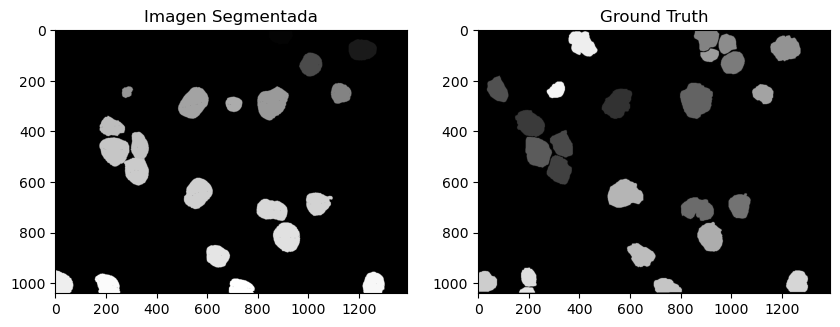

In [141]:
import matplotlib.pyplot as plt

# Visualización de las imágenes
def plot_comparison(pred, gt):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Imagen Segmentada")
    plt.imshow(pred, cmap="gray")
    plt.subplot(1, 2, 2)
    plt.title("Ground Truth")
    plt.imshow(gt, cmap="gray")
    plt.show()

# Mostrar la comparación entre las imágenes
plot_comparison(segmented_image, ground_truth_image)

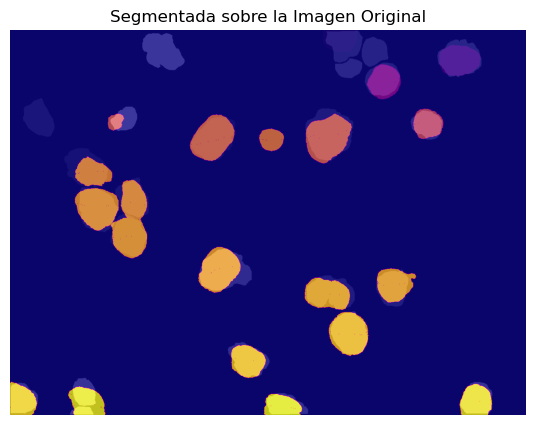

In [142]:
# Visualización de la imagen segmentada sobre la original
def plot_overlay(segmented, original, alpha=0):
    """
    Muestra la imagen segmentada superpuesta sobre la original con transparencia.
    segmented: Imagen segmentada
    original: Imagen original
    alpha: Nivel de transparencia de la segmentación
    """
    plt.figure(figsize=(10, 5))
    
    # Mostrar la imagen original
    plt.imshow(original, cmap="gray")
    
    # Mostrar la imagen segmentada con transparencia
    plt.imshow(segmented, cmap="plasma", alpha=alpha)  # Usamos un mapa de colores 'jet' para destacar las áreas
    plt.title("Segmentada sobre la Imagen Original")
    plt.axis('off')
    plt.show()

# Llamar a la función de visualización con las imágenes
plot_overlay(segmented_image, ground_truth_image, alpha=0.8)


In [143]:
import numpy as np
from sklearn.metrics import accuracy_score

# Calcular Accuracy
def calculate_accuracy(segmented, ground_truth, threshold=0.5):
    """
    Calcula el accuracy entre las imágenes segmentadas y las ground truth.
    threshold: Umbral para convertir las probabilidades en binario (0 o 1)
    """
    # Asegurarse de que las imágenes estén en formato binario (0 o 1)
    segmented_binary = (segmented > threshold).astype(int)
    ground_truth_binary = (ground_truth > threshold).astype(int)
    
    # Aplanar las imágenes para comparar los píxeles como vectores
    flattened_segmented = segmented_binary.flatten()
    flattened_ground_truth = ground_truth_binary.flatten()
    
    # Calcular el accuracy comparando los píxeles segmentados con la ground truth
    accuracy = accuracy_score(flattened_ground_truth, flattened_segmented)
    return accuracy

# Calcular Binary Cross-Entropy Loss
def calculate_bce_loss(segmented, ground_truth):
    # Asegúrese de que las imágenes estén en formato flotante
    segmented = segmented.astype(np.float32)
    ground_truth = ground_truth.astype(np.float32)
    
    # Evitar log(0) añadiendo un pequeño valor epsilon
    epsilon = 1e-15
    segmented = np.clip(segmented, epsilon, 1. - epsilon)
    
    # Calcular la Binary Cross-Entropy Loss
    bce_loss = -np.mean(ground_truth * np.log(segmented) + (1 - ground_truth) * np.log(1 - segmented))
    return bce_loss

# Calcular las métricas
accuracy = calculate_accuracy(segmented_image, ground_truth_image)
bce_loss = calculate_bce_loss(segmented_image, ground_truth_image)

# Mostrar los resultados
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"BCE Loss: {bce_loss:.4f}")

Accuracy: 94.01%
BCE Loss: 0.7627
